In [1]:
%autosave 0

Autosave disabled


In [15]:
import pandas as pd
from pydataset import data
#if halfway through your work, you need another library, you can import block and add import here. not at random places

Boolean masking -  
We can use an array of boolean values to return a subset of our series.  
We only get back values where the boolean array is True.  
We can evaluate multiple statements at once.

In [3]:
my_series = pd.Series(range(1, 21, 1))

In [4]:
my_series[my_series > 10]

10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

The curriculum has a method for determining which values belong in the fourth quartile.  

We could also do it with [pd.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html#pandas.qcut).  

We will pass two arguments: the pandas series, and the number of bins we want (4 for quartiles).

In [5]:
my_series[my_series % 2 == 1]

0      1
2      3
4      5
6      7
8      9
10    11
12    13
14    15
16    17
18    19
dtype: int64

In [9]:
my_series[(my_series > 10) | (my_series % 2 == 1)]

# | this is the logical 'or' vs the & sign

0      1
2      3
4      5
6      7
8      9
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

String vectorization.

We can perform string operations across all values in a series using the .str attribute.

In [14]:
pd.qcut(my_series, 4, labels = ['q1', 'q2', 'q3', 'q4'])



0     q1
1     q1
2     q1
3     q1
4     q1
5     q2
6     q2
7     q2
8     q2
9     q2
10    q3
11    q3
12    q3
13    q3
14    q3
15    q4
16    q4
17    q4
18    q4
19    q4
dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

In [16]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [17]:
mpg_t = mpg.trans

In [18]:
#string vectorization, going to take the series and manipulative
mpg_t.str.upper()

1        AUTO(L5)
2      MANUAL(M5)
3      MANUAL(M6)
4        AUTO(AV)
5        AUTO(L5)
          ...    
230      AUTO(S6)
231    MANUAL(M6)
232      AUTO(L5)
233    MANUAL(M5)
234      AUTO(S6)
Name: trans, Length: 234, dtype: object

In [23]:
mpg_t.str.replace('(', '_').str.replace(')', '_').str.upper()

/var/folders/mn/mp1xhgm522gc5vhffb_k61d00000gn/T/ipykernel_60396/1221487044.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mpg_t.str.replace('(', '_').str.replace(')', '_').str.upper()


1        AUTO_L5_
2      MANUAL_M5_
3      MANUAL_M6_
4        AUTO_AV_
5        AUTO_L5_
          ...    
230      AUTO_S6_
231    MANUAL_M6_
232      AUTO_L5_
233    MANUAL_M5_
234      AUTO_S6_
Name: trans, Length: 234, dtype: object

In [ ]:
"""There are other methods available for use! Some common ones include..

.any() and .all()
.isin()
.apply()"""

In [26]:
(mpg_t == 'auto(l5)').any()  # trying to see if there any entry that equal to that string

True

In [27]:
(mpg_t == 'auto(l5)').all()  # this will show all equal to that value

False

In [33]:
mpg_t.isin(['auto(l5)'])

1       True
2      False
3      False
4      False
5       True
       ...  
230    False
231    False
232     True
233    False
234    False
Name: trans, Length: 234, dtype: bool

In [34]:
def mathinator(n):
    
    return n * 2 + 4 / 3

In [36]:
my_series.apply(mathinator)

0      3.333333
1      5.333333
2      7.333333
3      9.333333
4     11.333333
5     13.333333
6     15.333333
7     17.333333
8     19.333333
9     21.333333
10    23.333333
11    25.333333
12    27.333333
13    29.333333
14    31.333333
15    33.333333
16    35.333333
17    37.333333
18    39.333333
19    41.333333
dtype: float64

In [31]:
"""We can bin values using pd.cut.

We can specify the number of bins to create, to make n bins of equal size.

We can also create the cutoffs for the bins ourselves."""

'We can bin values using pd.cut.\n\nWe can specify the number of bins to create, to make n bins of equal size.\n\nWe can also create the cutoffs for the bins ourselves.'

In [37]:
pd.cut(my_series, 5)   #this is different from qcut is we can define custom cut off for the bins

0     (0.981, 4.8]
1     (0.981, 4.8]
2     (0.981, 4.8]
3     (0.981, 4.8]
4       (4.8, 8.6]
5       (4.8, 8.6]
6       (4.8, 8.6]
7       (4.8, 8.6]
8      (8.6, 12.4]
9      (8.6, 12.4]
10     (8.6, 12.4]
11     (8.6, 12.4]
12    (12.4, 16.2]
13    (12.4, 16.2]
14    (12.4, 16.2]
15    (12.4, 16.2]
16    (16.2, 20.0]
17    (16.2, 20.0]
18    (16.2, 20.0]
19    (16.2, 20.0]
dtype: category
Categories (5, interval[float64, right]): [(0.981, 4.8] < (4.8, 8.6] < (8.6, 12.4] < (12.4, 16.2] < (16.2, 20.0]]

In [38]:
pd.cut(my_series, [4, 9, 10])

0             NaN
1             NaN
2             NaN
3             NaN
4      (4.0, 9.0]
5      (4.0, 9.0]
6      (4.0, 9.0]
7      (4.0, 9.0]
8      (4.0, 9.0]
9     (9.0, 10.0]
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
dtype: category
Categories (2, interval[int64, right]): [(4, 9] < (9, 10]]

We can plot values from a series using the .plot() method.

We can further alter the plot by calling .plot.hist(), for example.

We can modify our plot by passing in arguments to the plotting method.

<Axes: >

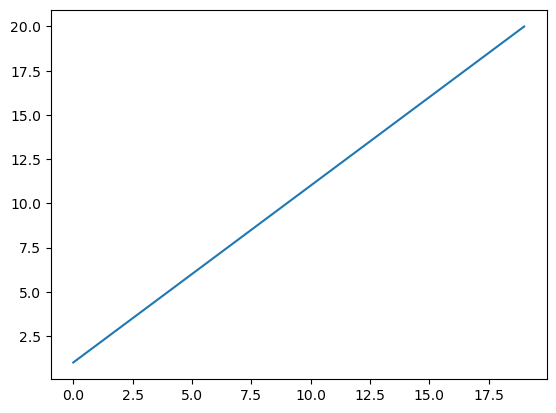

In [39]:
my_series.plot()      #Jupyter is using matplotlib library to provide visualization

<Axes: title={'center': 'title test'}>

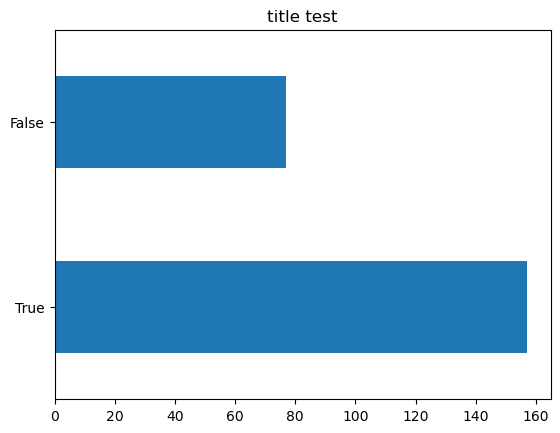

In [50]:
mpg_t.str.startswith('a').value_counts().plot.barh(title='title test')  #True is automatic car.barh is horizontal bar plot 